In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="7" color="red">ch10. N차원배열다루기(Numpy 배열)</font></b>
- [numpy](http://www.numpy.org)
- [numpy docs](https://numpy.org/doc/stable)
- 2차원 배열은 행렬개념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)
# 1절 넘파이 패키지

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [3]:
# np.arange(from, stop, by) : from부터 stop앞까지 by씩 증가하는 1차원 배열 생성
a = np.arange(15) # 0부터 15앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [4]:
from numpy import arange
a = arange(15,
#           dtype=np.int32    
          ).reshape(3, 5)# 3행5열짜리 2차원 배열로 변환
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [5]:
type(a) # a변수의 타입

numpy.ndarray

In [6]:
a.dtype # a배열의 요소들의 type

dtype('int32')

In [7]:
a.dtype.name

'int32'

In [8]:
a.itemsize # a배열안의 한 요소의 bytesize

4

In [9]:
a.ndim # 축수(차원수)

2

In [10]:
a.size # 배열 요소의 갯수

15

In [11]:
a.shape # 배열의 구조(3행5열)

(3, 5)

In [12]:
print('shape 조정 전 a\n',a)
a.shape =(5, 3)
print('shape 조정 후 a\n',a)

shape 조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape 조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 1.2 배열 타입 변경

In [13]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
a.size # 요소갯수

12

In [15]:
a.dtype

dtype('int32')

In [16]:
a.itemsize

4

In [17]:
a.dtype = np.int64 # 읽을 때 int64로(64bit씩) 읽는다
a.dtype

dtype('int64')

In [18]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [19]:
a.size

6

In [20]:
# 배열요소의 타입을 수정
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
a = a.astype('int64')
# a.astype(np.int64)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [22]:
a.itemsize

8

In [23]:
a.size

12

In [24]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [25]:
a.ravel() #flatten 된 배열 return

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [26]:
a.flatten() # 함수의 결과가 return되면 배열 수정안함

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장
- pkl(객체저장, 배열, 머신러닝 모델) vs npy(넘파이 전용 포맷, io속도 개선) 

In [27]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [28]:
%%time
import pickle
with open('data/ch10.pkl', 'wb') as f:
    pickle.dump(a, f)

CPU times: total: 0 ns
Wall time: 994 µs


In [29]:
%%time
with open('data/ch10.pkl', 'rb') as f:
    loaded_a = pickle.load(f)

CPU times: total: 0 ns
Wall time: 1.01 ms


In [30]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [31]:
%%time
np.save('data/ch10.npy', a) # 저장

CPU times: total: 0 ns
Wall time: 1.09 ms


In [32]:
%%time
loaded_a2 = np.load('data/ch10.npy')

CPU times: total: 0 ns
Wall time: 997 µs


# 2절 넘파이 배열
- array()함수를 이용하여 다른 파이썬 구조(list,tuple)를 배열로 변환
- 기타함수들 : arange, ones, zeros, full, empty.....linspace
- 랜덤값을 갖는 함수들 : np.random.~ 
## 2.1 array()함수로 넘파이 배열 만들기
    - array(obj, dtype=np.xx나 'xx', copy=T/F)

In [33]:
a = np.array([2, 4, 6], dtype=np.int16) # 정수의 기본타입은 int32
a

array([2, 4, 6], dtype=int16)

In [34]:
a[0],a[1],a[2]

(2, 4, 6)

In [35]:
for i in a:
    print(i, end='\t')

2	4	6	

In [36]:
b = np.array([[1.5, 2.3], # 배열은 동일 자료형의 집합
             [4,     5]])
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [37]:
b[0][1], b[0,1] # 2차원[axis0행 axic1열]

(2.3, 2.3)

In [38]:
l = [ [1.5, 2.3], [4,   5]]
l[0][1]

2.3

In [39]:
print(b.dtype) # 정수 기본타입은 int32, 실수 기본타입은 float64
print(b.itemsize)

float64
8


In [40]:
b = b. astype(np.float32) # 함수의 결과를 return하면 a는 그대로
b

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [41]:
b.dtype

dtype('float32')

print(b.dtype) # 정수 기본타입은 int32, 실수 기본타입은 float64
print(b.itemsize)

In [42]:
for row in b:
    for item in row:
        print(item, end='\t')
    print()

1.5	2.3	
4.0	5.0	


In [43]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print('{}행{}열 : {:.1f}({:.1f})'.format(i, j, item, b[i,j]), end='\t')
    print() # 개행

0행0열 : 1.5(1.5)	0행1열 : 2.3(2.3)	
1행0열 : 4.0(4.0)	1행1열 : 5.0(5.0)	


In [44]:
# 행렬의 인덱싱, 슬라이싱
b =np.array([[1,2,3,4,5],[6,7,8,9,0],[11,12,13,14,15]],dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [11, 12, 13, 14, 15]], dtype=int16)

In [45]:
b[0,1]

2

In [46]:
b[3,0] # 없는 인덱싱시 에러 ex. b[3,0]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
print('0~1행, 1~2열 :\n', b[0:2, 1:3]) 
print('2행모두(1차원) :', b[2, :], b[2])      # 특정행, 모든 열을 추출할 경우, 열생략 가능
print('2행모두(2차원) :', b[2:3, :], b[2:3])      # 특정행, 모든 열을 추출할 경우, 열생략 가능
print('4열모두(1차원) :', b[:,4], b[...,4], b[:, -1])  # 특정열, 모든행을 추출할 경우
print('2행 0~3열 :', b[2, 0:-1])               
print('마지막열 제외 :\n', b[:, :-1])

In [ ]:
# 스칼라 변수
a = 10
copy_a = a # 깊은 복사
print(f"a={a}, 복제본{copy_a}")
copy_a = -1
print(f"a={a}, 복제본{copy_a}")

In [ ]:
# 데이터 구조
a = [0, 1]
copy_a = a.copy() # 깊은 복사
print(f"a={a}, 복제본{copy_a}")
copy_a[0] = -1
print(f"a={a}, 복제본{copy_a}")

In [53]:
# numpy 배열
import numpy as np
c = np.array([ [1,2], [3,4] ])
# d = c # 주소 할당
d = np.array(c, copy=True) # 깊은 복사 ; d = c.copy()동일
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))
d[0,0]= 9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]
2937703175376 2937726657968
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
- np.zeros(tup) : 요소들이 다 0
- np.ones(tup) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 두번째 매개변수
- np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값 달라짐)

※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64. dtype속성을 따로 지정 가능

In [83]:
x = np.zeros( (3,2) ) # 3행2열짜리 2차원 float64 배열(요소들은 다 0)
# x = np.zeros( 3,2 ) # 에러
x = np.zeros( (3,) ) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x = np.zeros( 3 ) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x

array([0., 0., 0.])

In [58]:
x = np.zeros( (2, 5), dtype=np.int16)
print(x)
print(x.dtype)
print(x.itemsize)

[[0 0 0 0 0]
 [0 0 0 0 0]]
int16
2


In [61]:
np.ones( (2,5), dtype=np.uint8)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [66]:
np.full( (2,3), -1.2)

array([[-1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2]])

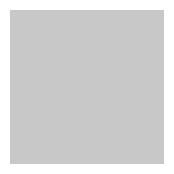

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2)) # 시각화한 그래프 크기 figsize=(가로, 세로)
img = np.full( (28,28), 200, dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0,vmax=255)
plt.axis('off') # 축 없애기 
plt.show()

In [81]:
np.empty( (3, 2) ) # 초기값이 메모리 상태에 따라 다름

array([[  0.,   0.],
       [  0., 200.],
       [200.,   0.]])

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값 배열
- np.random.unifrom(low=0.0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0.0, scale=1.0, size=tup) : 평균loc과 표준편차 scale을 갖는 정규분포 랜덤값

- np.random.rand(n) : 균등분포의 1차원 난수 배열발생(난수 n개)
- np.random.randn(n) : 표쥰정규분포(평균0,표준편차1)

cf) np.random.randint([from,] to) : from부터 to미만의 정수 난수 1개발생==ramdom.dandint(from, to-1)

<function matplotlib.pyplot.show(close=None, block=None)>

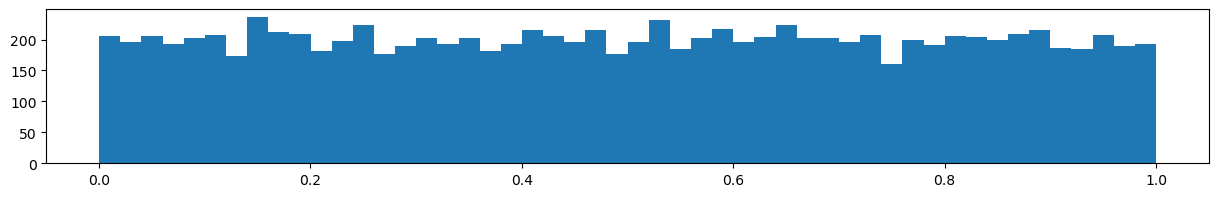

In [99]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15,2)) # 그래프 크기
plt.hist(x, bins=50)
plt.show

In [85]:
np.random.randint(1, 3) # 1, 2

2

<function matplotlib.pyplot.show(close=None, block=None)>

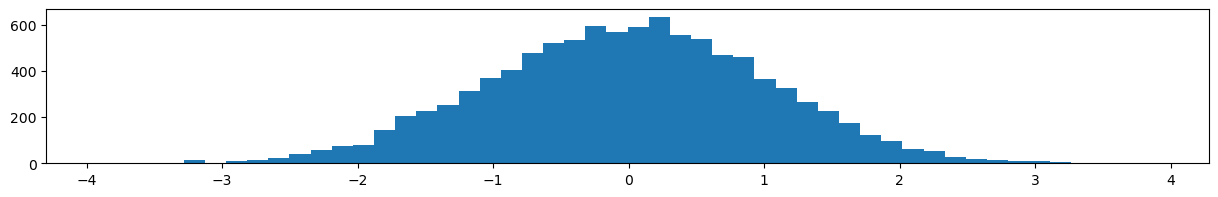

In [101]:
x = np.random.randn(10000) # 정규분포(표준정규분포는 평균0, 표준편차가 1인 정규분포)
plt.figure(figsize=(15,2)) # 그래프 크기
plt.hist(x, bins=50)
plt.show

In [103]:
# 1차원 나수 배열
print(np.random.rand(3)) # 균등분포
print(np.random.randn(3)) # 정규분포

[0.61866775 0.83139316 0.49483286]
[-0.34380531  1.23741378 -0.4109945 ]


In [104]:
# 2차원 난수 배열
np.random.random( (2,5) ) # 2행5열짜리 균등분포(0~1미만) 난수 배열

array([[0.64769808, 0.44631214, 0.23325641, 0.84210169, 0.40158788],
       [0.33262492, 0.2068307 , 0.86123168, 0.6646741 , 0.82158491]])

In [106]:
np.random.uniform(low=-2, high=2, size=(2,5)) # 2행5열짜리 균등분포(-2~2미만) 난수 배열

array([[ 0.10308759, -1.99457025, -1.06831411, -0.72060819,  0.83422663],
       [-0.41581549, -0.20843231, -1.74050781,  0.93264826, -1.94036909]])

In [107]:
np.random.normal(size=(2,5)) # 2행5열짜리 정규분포(평균0, 표준편차1) 난수 배열

array([[-0.80067734,  1.28561273, -0.66734937,  0.6765524 , -0.17798936],
       [-1.2394803 , -0.70096617, -0.1917183 , -0.03965129,  0.01340845]])

In [108]:
np.random.normal(-ㅛ1, 1, size=(2,5)) # 2행5열짜리 정규분포(평균-1, 표준편차1) 난수 배열

array([[-0.41285867,  1.74015049,  0.67470087, -0.82340094,  0.37131446],
       [-0.84188436,  0.07531518, -1.98847155, -0.24630552, -0.06983578]])

## 2.4 연속된 값을 갖는 1차원 배열 만들기
- np.arange(from, to, by, dtype) : from부터 to앞까지 by씩 건너 뛴 값을 1차원 배열로 생성
- np.linspace(from, to, num) :  from부터 to(to포함)까지 num개 숫자들 1차원 배열로 생성


In [110]:
np.arange(10, 30, 5, dtype=np.float64)

array([10., 15., 20., 25.])

In [112]:
np.arange(0, 2.0, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [114]:
np.linspace(0, 5, 5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [124]:
# linspace : 특정한 범위의 수들을 많이 생성할 때
from numpy import pi, linspace
x = linspace(0, 2*pi, 1000)
y = np.sin(x)

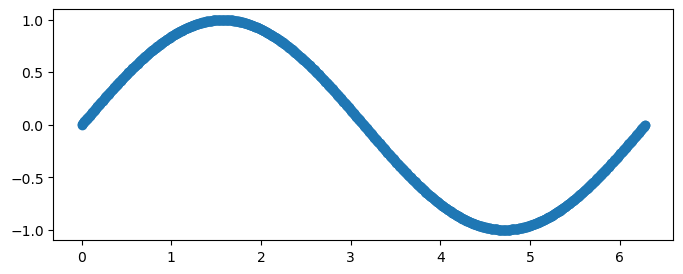

In [126]:
plt.figure(figsize=(8, 3))
plt.scatter(x, y)
plt.show()

## 2.5 배열의 차원 변경
- reshape(행수, 열수) : -1 가능 
- resize(행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환
※ 실행결과가 출력되면 배열리 수정되지 않고, 실행결과가 없으면 배열리 수정됨

In [128]:
t = np.random.random( (2,3) )
t

array([[0.99890576, 0.57162428, 0.61334661],
       [0.16423139, 0.10639706, 0.65443253]])

In [131]:
a = np.round(t*10) # 반올림
a

array([[10.,  6.,  6.],
       [ 2.,  1.,  7.]])

In [133]:
a = a.astype(np.int16)
a

array([[10,  6,  6],
       [ 2,  1,  7]], dtype=int16)

In [136]:
a = a.reshape(3,2)
a

array([[10,  6],
       [ 6,  2],
       [ 1,  7]], dtype=int16)

In [137]:
a.reshape(-1, 1) # -1이 주어지면 해당차원의 크기가 자동 계산

array([[10],
       [ 6],
       [ 6],
       [ 2],
       [ 1],
       [ 7]], dtype=int16)

In [138]:
a.reshape(3, -1)

array([[10,  6],
       [ 6,  2],
       [ 1,  7]], dtype=int16)

In [141]:
a.resize(2, 3) # 실행결과가 출력 안 되면 a가 바뀜
a

array([[10,  6,  6],
       [ 2,  1,  7]], dtype=int16)

In [143]:
a.reshape( (3,2) )
a

array([[10,  6,  6],
       [ 2,  1,  7]], dtype=int16)

In [145]:
a.resize(2, -1) # resize는 -1 사용 불가

ValueError: negative dimensions not allowed

In [146]:
# 전치행렬 (x행y열 -> y행x열)
a.T # a의 전치행렬

array([[10,  2],
       [ 6,  1],
       [ 6,  7]], dtype=int16)

In [147]:
a.transpose() # a의 전치행렬

array([[10,  2],
       [ 6,  1],
       [ 6,  7]], dtype=int16)

## 2.6 배열 출력

In [153]:
np.arange(1000)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [154]:
# 배열 요소가 몇개까지 다 출력되나. 1000개 요소 이상은 생략되서 출력
np.get_printoptions()['threshold']

1000

In [155]:
# 배열이 커서 인쇄가 안되는 경우 : 모서리부분만 출력
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [156]:
# 인쇄 옵션 변경
import sys
np.set_printoptions(threshold=sys.maxsize) # 정수 최대치까지 출력가능
np.set_printoptions(threshold=sys.inf) # 무한대까지 출력가능

In [157]:
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])